### Plot _thornado_  shock detector data

Notebook for quick plotting of 1D _thornado_ shock detector data for the limter parameter study. 

---

Action Items:
0. ~~Redo data structure: consider Python dictionary, `data['run']['field']`~~

1. ~~Compute and Plot Cell Averages~~
    
2. ~~Finish Runs~~ 

3. ~~Create Error Function~~

4. ~~Create Total Varaition Calculation~~

5. ~~Create Tables~~
   
6. Do another componentwise limiting run   

7. **Shock Detector**

8. Compare Winner (2.0, 0.2) to Componentwise. Same parameters. **CW is crashing**
---
To Do (Functional):  

* Make it easier to select what to plot. Currently: Very Manual 
* Want easier use for data from multiple runs
* Combine reading of data and creating data structures into one loop
---

In [1]:
import h5py    
import numpy as np  
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
%matplotlib ipympl

Some global plotting options

In [2]:
mpl.rcParams['lines.linewidth'] = 4
mpl.rcParams['legend.handlelength']=4
mpl.rcParams['legend.fontsize']=14
mpl.rcParams['legend.frameon']=False
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['xtick.minor.visible']=True
mpl.rcParams['ytick.minor.visible']=True
mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 2
mpl.rcParams['ytick.minor.width'] = 2
mpl.rcParams['xtick.labelsize']   = 14
mpl.rcParams['ytick.labelsize']   = 14

Data Directory. Simply change `simName` to the desired simulation. Later will likely have to modify.

In [3]:
sims = ["100_B1.0_C0.0_3", "100_B1.0_C1.5E-2_3", "100_B1.0_C5E-2_3", "100_B1.0_C1.0E-1_3",
        "100_B1.5_C0.0_3", "100_B1.5_C1.5E-2_3", "100_B1.5_C5E-2_3","100_B1.5_C1.0E-1_3",
        "100_B1.75_C0.0_3", "100_B1.75_C1.5E-2_3", "100_B1.75_C5E-2_3","100_B1.75_C1.0E-1_3",
        "100_B2.0_C0.0_3", "100_B2.0_C1.5E-2_3", "100_B2.0_C5E-2_3", "100_B2.0_C1.0E-1_3"] #The desired run

#fields = [ 'uAF_P', 'uAF_Ye', 'uPF_V1', 'uCF_D', 'uCF_Ne' ]
dataDirs = []#np.zeros( len(sims) )
for i in range( len( sims) ):
    dataDirs.append("../../data/Sod/nuclear/paramStudy" + "/" + sims[i])
dataDir_ref = "../../data/Sod/nuclear/reference"

Setup figure directory

In [4]:
figDir = "../figures/"

For now, manually specify the `fileNumber`. Possibly add in ways to automatically get the max.

In [5]:
fileNumberF = 102 #final
#fileName = dataDir + '/' + simName + '_FluidFields_' + fileNumber + '.h5' 
fileNames = []
#for i in range( len( sims) ): #For now, just use the 'winner'
for i in range(10):
    fileNames.append(dataDirs[11] + '/' + 'RiemannProblem' + '_FluidFields_00000' + str(i) + '.h5' )
for i in range(10,100):
    fileNames.append(dataDirs[11] + '/' + 'RiemannProblem' + '_FluidFields_0000' + str(i) + '.h5' )
    
for i in range(100,fileNumberF+1):
    fileNames.append(dataDirs[11] + '/' + 'RiemannProblem' + '_FluidFields_000' + str(i) + '.h5' )
    


Read the Data and load into a python dict

In [6]:
#data = np.zeros((fileNumberF-2,100)) # Point Values
data = np.zeros((fileNumberF+1,100)) # Point Values
time = {}
# for i in range( 2,len( fileNames ) ):
for i in range(len( fileNames ) ):
    
    with h5py.File(fileNames[i], 'r') as f:
        
#         for key in f.keys():
#             print(key)

        time_in = f['Time'][:]
        time[i] = time_in[0]

        x1 = f['/Spatial Grid/X1'][:]
        
        shock = f['/Shock Detector/Shock'][:]
        

       # print("Time:", float(time), "ms")
        x1 = x1[:]
        data[i] = shock[:]

      

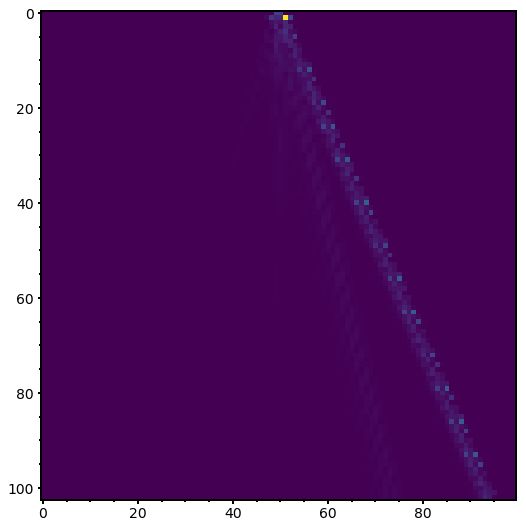

In [7]:
x = np.linspace(-5,5,100)
fig, ax1 = plt.subplots(1,figsize=(9,9))

ax1.imshow(data)

Plot

[-5.0, 5.0, 0.0, 0.025]

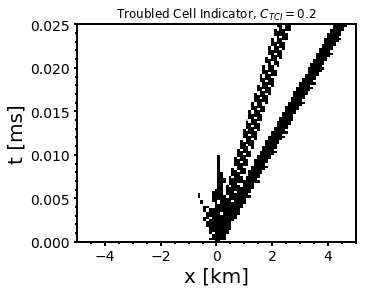

In [8]:
# generate 2 2d grids for the x & y bounds
xp = np.linspace(-5,5,100)
tp = np.linspace(0,0.025,103)
x, y = np.meshgrid(xp, tp)



fig, ax = plt.subplots(figsize=(5,4))

#vmin and vmax set the bounds of the colorbar
clims = [ 0.0300, 0.0301 ];
c = ax.pcolormesh(x, y, data,cmap="Greys", vmin = 0.03, vmax = 0.0301)
ax.set_title(r'Troubled Cell Indicator, $C_{TCI}=0.2$')
ax.set_xlabel('x [km]')
ax.set_ylabel('t [ms]')
#ax.cmap.set_under('whitesmoke')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
#fig.colorbar(c, ax=ax)
